**Assignment 5 - Multi-Linear Regression model**

Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [3]:
data=pd.read_csv('/content/ToyotaCorolla.csv',encoding='unicode_escape')

In [6]:
data.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

considering columns of given interest

In [7]:
data=data[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]

In [9]:
data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


Renaming lenghty column names to shorter one

In [12]:
data1= data.rename({'Age_08_04':'Age','Quarterly_Tax':'Tax'},axis=1)
data1.head()

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


Check for null values and dropping duplicate values if present

In [13]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   Age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   cc      1436 non-null   int64
 5   Doors   1436 non-null   int64
 6   Gears   1436 non-null   int64
 7   Tax     1436 non-null   int64
 8   Weight  1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [14]:
data1[data1.duplicated(keep=False)]

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
112,24950,8,13253,116,2000,5,5,234,1320
113,24950,8,13253,116,2000,5,5,234,1320


In [15]:
d2=data1.drop_duplicates()

In [16]:
d2.shape

(1435, 9)

Correlation check

In [18]:
d2.corr()          ## there is less collinearity between independent variables in the data

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


Using Pairplot

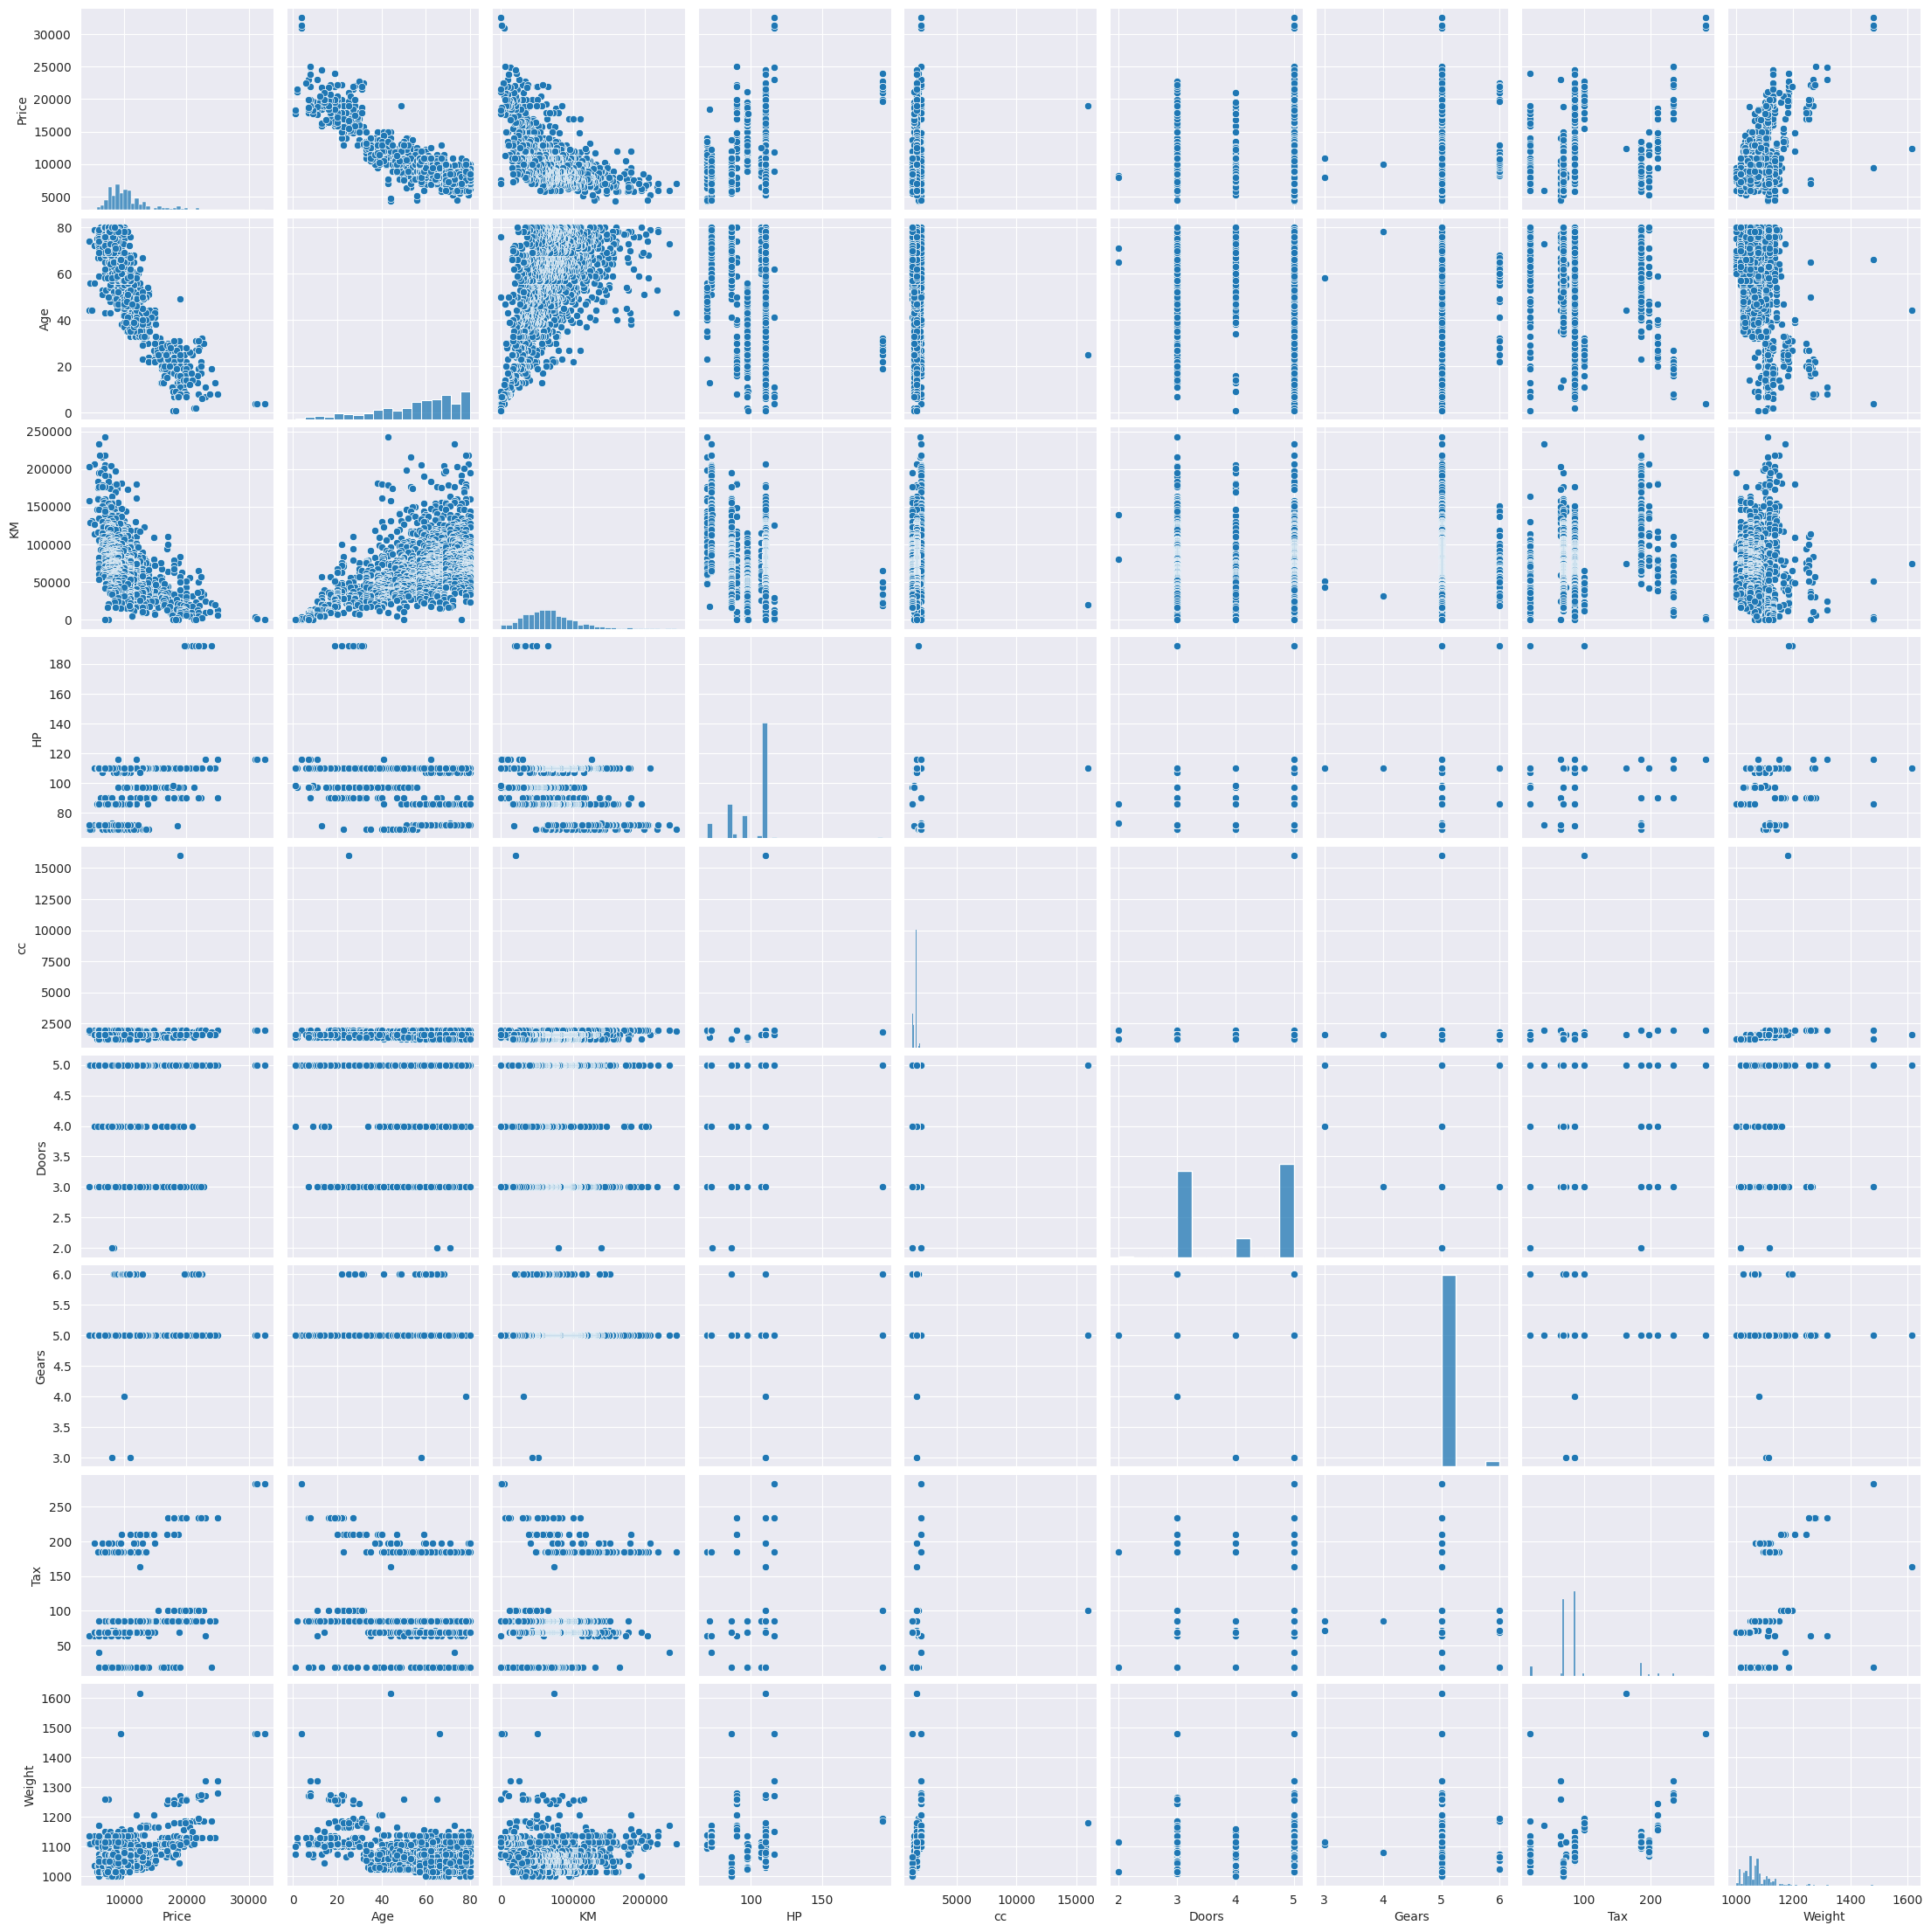

In [19]:
sns.set_style(style='darkgrid')
sns.pairplot(d2)

**Building a Model**- to predict a car price

Model 1 (without any transformation)

In [20]:
m1=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Tax+Weight',data=d2).fit()

In [21]:
m1.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
cc             -0.118558
Doors          -0.920189
Gears         597.715894
Tax             3.858805
Weight         16.855470
dtype: float64

In [22]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        07:01:23   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
cc            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
Tax            3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
pred1=m1.predict(d2.iloc[:,1:])
pred1

0       16791.958871
1       16253.800414
2       16779.635210
3       16405.789389
4       16200.217277
            ...     
1431     8794.255037
1432     8292.577342
1433     8455.434402
1434     8579.222041
1435    10396.087526
Length: 1435, dtype: float64

In [28]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [53]:
R1=sqrt(mean_squared_error(pred1,d2.Price))
R1

1337.590250731075

Residual Analysis

1) Normality check 
2) Homoscedasticity check

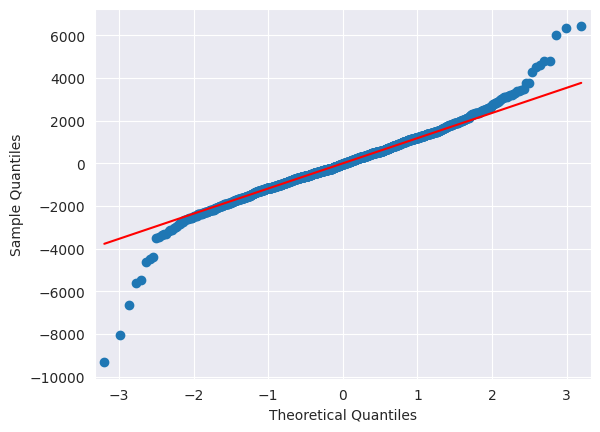

In [30]:
plot=sm.qqplot(m1.resid,line='q')
plt.show()

To get the index values of data points looking from graph

In [31]:
list(np.where(m1.resid<-4000))

[array([190, 191, 220, 392, 401, 600, 653, 959])]

In [32]:
list(np.where(m1.resid>4000))

[array([ 109,  110,  111,  124,  146,  170,  522, 1057])]

In [35]:
def get_standardized_values(R):
    return (R-R.mean())/R.std()

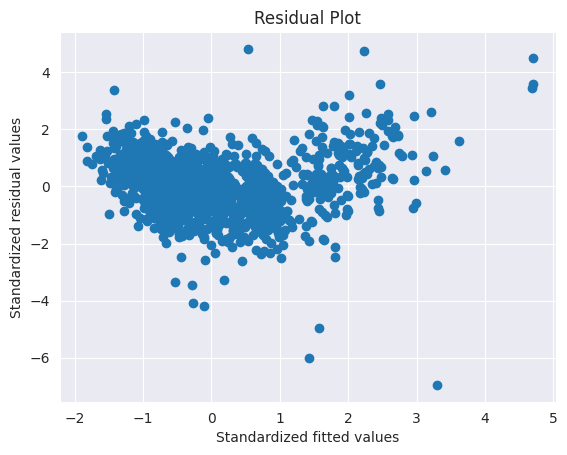

In [37]:
plt.scatter(get_standardized_values(m1.fittedvalues),get_standardized_values(m1.resid))
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardized residual values')
plt.title('Residual Plot')
plt.show()

Dropping the index values we obtained above, <-4000 and >4000

In [43]:
d3=d2.drop(d2.index[[109,110,111,124,146,170,190,191,220,392,401,522,600,653,959,1057 ]],axis=0).reset_index()

In [44]:
d3=d3.drop(['index'],axis=1)

In [45]:
d3.shape

(1419, 9)

**Model 2**- based on d3 dataset building a model

In [46]:
m2=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Tax+Weight',data=d3).fit()

In [47]:
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     1325.
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        07:25:31   Log-Likelihood:                -12042.
No. Observations:                1419   AIC:                         2.410e+04
Df Residuals:                    1410   BIC:                         2.415e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.281e+04   1458.915     -8.779      0.000   -1.57e+04   -9946.344
Age         -114.9859      2.417    -47.568      0.000    -119.728    -110.244
KM            -0.0200      0.001    -17.773      0.000      -0.022      -0.018
HP            20.8295      2.586      8.054      0.000      15.756      25.903
cc            -0.1586      0.080     -1.981      0.048      -0.316      -0.002
Doors        -73.5254     36.164     -2.033      0.042    -144.467      -2.584
Gears        649.4229    172.976      3.754      0.000     310.105     988.741
Tax           -4.2058      1.298     -3.240      0.001      -6.752      -1.659
Weight        25.0748      1.268     19.773      0.000      22.587      27.562
==============================================================================
Omnibus:                        5.850   Durbin-Watson:                   1.692
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                6.526
Skew:                           0.082   Prob(JB):                       0.0383
Kurtosis:                       3.289   Cond. No.                     3.65e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.65e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
pred2=m2.predict(d3.iloc[:,1:])

In [54]:
R2=sqrt(mean_squared_error(pred2,d3.Price))
R2

1173.4030469746838

Detecting influencer points or influencers - Cook's distance

In [56]:
m2_influencer=m2.get_influence()

In [57]:
(A,_)=m2_influencer.cooks_distance

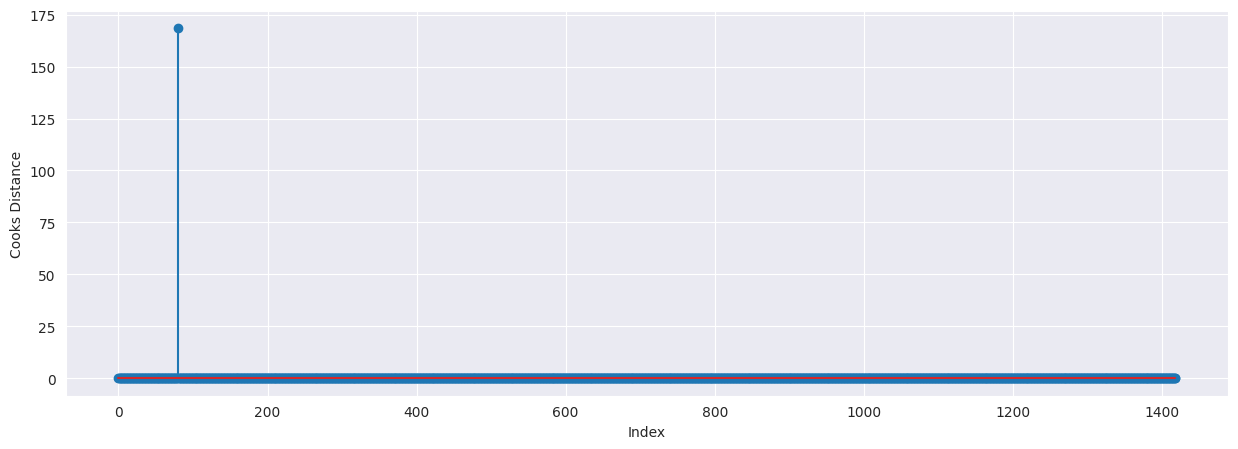

In [64]:
plt.figure(figsize=(15,5))
plt.stem(np.arange(len(d3)), np.round(A, 3))
plt.xlabel('Index')
plt.ylabel('Cooks Distance')
plt.show()

In [65]:
(np.argmax(A),np.max(A))   ## to know where outlier/influencer is present

(80, 168.4854878268442)

Plotting influencer plot to see outlier presence

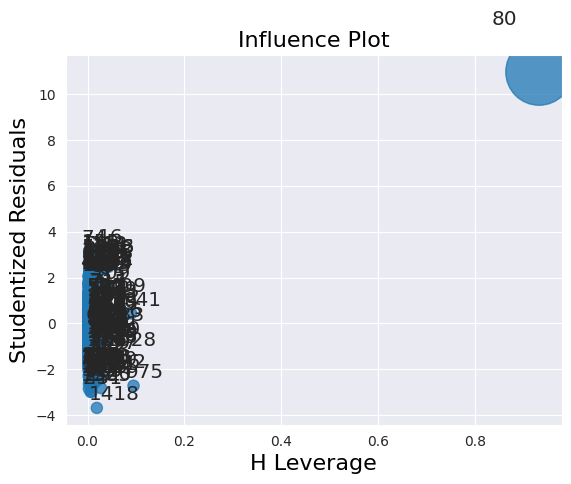

In [66]:
influence_plot(m2)
plt.show()

Calculating leverage value

In [67]:
k=d3.shape[1]
n=d3.shape[0]
LV=3*((k+1)/n)
LV

0.021141649048625793

Removing data from 80th position

In [75]:
d4=d3.drop(d3.index[[80]],axis=0).reset_index()

In [76]:
d4=d4.drop(['index'],axis=1)

In [78]:
d4.shape

(1418, 9)

**Model 3**- building a model based on d4 dataset

In [79]:
m3=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Tax+Weight',data=d4).fit()

In [80]:
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     1445.
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        07:44:35   Log-Likelihood:                -11977.
No. Observations:                1418   AIC:                         2.397e+04
Df Residuals:                    1409   BIC:                         2.402e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.622e+04   1435.062    -11.300      0.000    -1.9e+04   -1.34e+04
Age         -110.6898      2.354    -47.019      0.000    -115.308    -106.072
KM            -0.0169      0.001    -15.231      0.000      -0.019      -0.015
HP            29.9245      2.619     11.428      0.000      24.788      35.061
cc            -3.2624      0.294    -11.115      0.000      -3.838      -2.687
Doors       -134.9626     35.177     -3.837      0.000    -203.968     -65.957
Gears        531.3663    166.454      3.192      0.001     204.842     857.891
Tax            1.3796      1.347      1.024      0.306      -1.262       4.021
Weight        31.8442      1.366     23.320      0.000      29.166      34.523
==============================================================================
Omnibus:                        8.891   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.012   Jarque-Bera (JB):               10.119
Skew:                           0.119   Prob(JB):                      0.00635
Kurtosis:                       3.338   Cond. No.                     3.74e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
pred3=m3.predict(d4.iloc[:,1:])

In [90]:
R3=sqrt(mean_squared_error(pred3,d4.Price))
R3

1126.790284824597

In [85]:
m3_influencer = m3.get_influence()
(B, _) = m3_influencer.cooks_distance

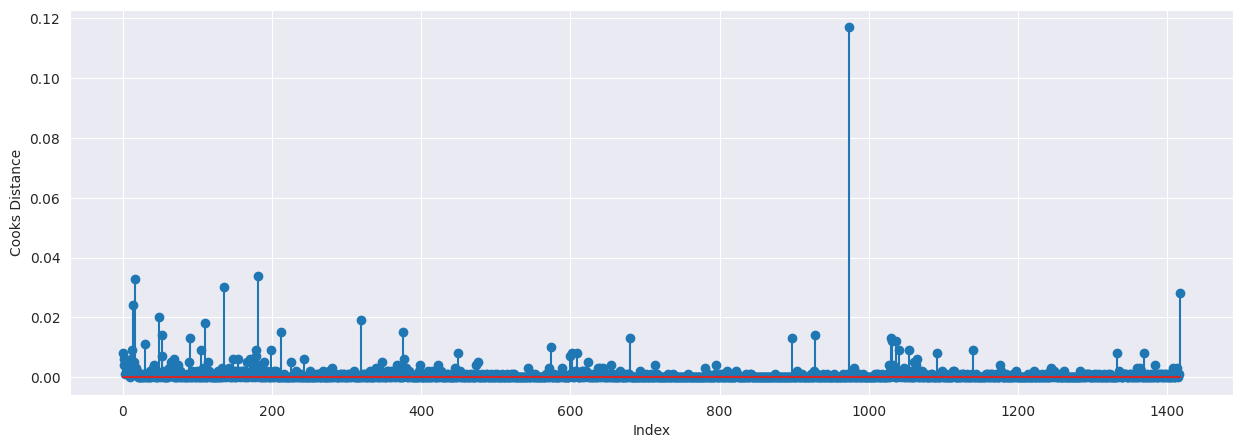

In [86]:
plt.figure(figsize=(15, 5))
plt.stem(np.arange(len(d4)), np.round(B, 3))
plt.xlabel('Index')
plt.ylabel('Cooks Distance')
plt.show()

In [87]:
(np.argmax(B),np.max(B))       ##to know where the outliers are present

(974, 0.11665661388520678)

Dropping the data at 974th position

In [88]:
d5=d4.drop(d4.index[[974]],axis=0).reset_index()

In [89]:
d5=d5.drop(['index'],axis=1)

**Model 4**- building a model on d5 dataset where there are no outliers

In [91]:
m4=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Tax+Weight',data=d5).fit()

In [92]:
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     1455.
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        07:54:00   Log-Likelihood:                -11964.
No. Observations:                1417   AIC:                         2.395e+04
Df Residuals:                    1408   BIC:                         2.399e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.569e+04   1440.268    -10.892      0.000   -1.85e+04   -1.29e+04
Age         -110.3879      2.349    -47.001      0.000    -114.995    -105.781
KM            -0.0169      0.001    -15.269      0.000      -0.019      -0.015
HP            30.4886      2.616     11.653      0.000      25.356      35.621
cc            -3.2922      0.293    -11.246      0.000      -3.866      -2.718
Doors       -144.2598     35.189     -4.100      0.000    -213.288     -75.231
Gears        364.8142    174.098      2.095      0.036      23.295     706.333
Tax            1.3355      1.343      0.995      0.320      -1.298       3.969
Weight        32.1468      1.365     23.559      0.000      29.470      34.824
==============================================================================
Omnibus:                        9.350   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               10.478
Skew:                           0.131   Prob(JB):                      0.00531
Kurtosis:                       3.330   Cond. No.                     3.76e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.76e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [94]:
pred4=m4.predict(d5.iloc[:,1:])

In [98]:
R4=sqrt(mean_squared_error(pred4,d5.Price))
R4

1123.2127870799336

Consolidating the values from above models

In [99]:
Data=pd.DataFrame({"Model":pd.Series(['m1','m2','m3','m4']),
                   "rsquared":(m1.rsquared,m2.rsquared,m3.rsquared,m4.rsquared),
                   "AIC":(m1.aic,m2.aic,m3.aic,m4.aic),
                   "rmse":(R1,R2,R3,R4)
                  })

In [100]:
Data

,Model,rsquared,AIC,rmse
0,m1,0.862520,24750.407207,1337.590251
1,m2,0.882568,24102.976267,1173.403047
2,m3,0.891341,23971.045862,1126.790285
3,m4,0.892058,23945.141619,1123.212787


From the above data,
Model 4 gave a higher rsquared value, lower Root mean squared error and lower AIC value of 2.3945e+04. Thus, model 4 is best model to predict a car price.